In [2]:

import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd
import numpy  as np

import foa

( G , pos ) = foa.importCSV('esnet6_proposed_footprint.txt')
            
types = nx.get_node_attributes(G,'type')
end_sites  = [ k for k,v in types.items() if v == 'S']
core_sites = [ k for k,v in types.items() if v == 'C']        

nx.write_graphml(G,'network.graphml')


First visualize the topology and capacity based on the model that was read in from the external CSV file.

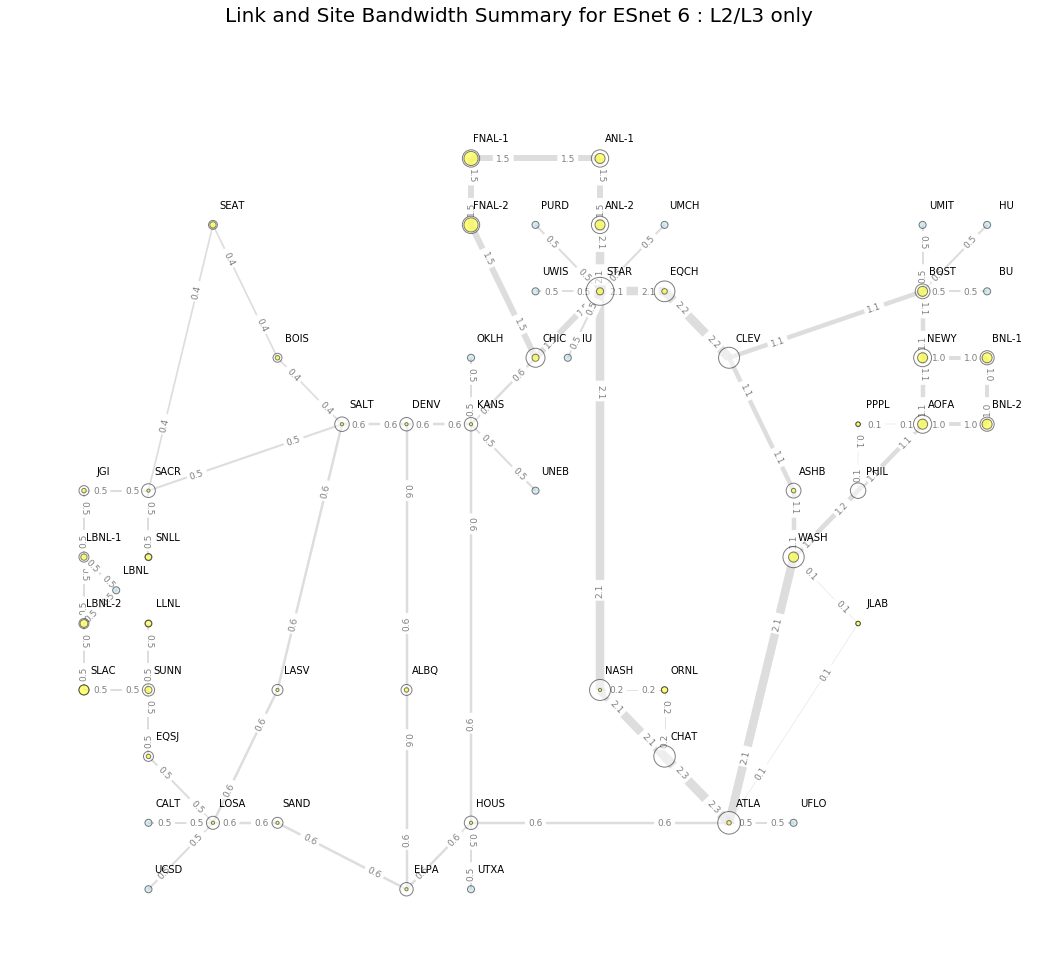

In [3]:
fig = plt.figure(figsize=(18,15))
plt.axis('off')

foa.drawBaseMap(G  , pos=pos , node_color='yellow' , arrows=False , alpha=0.5 )

fig.suptitle('Link and Site Bandwidth Summary for ESnet 6 : L2/L3 only', fontsize=20)

plt.show()

In [21]:

flow_sources = ['BNL-2' , 'UNEB' , 'UCSD']
(all_flows_pd , all_flows , all_flow_rates ,all_flow_rates_pd ) = foa.computeMaxFlows( G , 
                                                                        flow_sources = flow_sources , 
                                                                        flow_dests = end_sites );

print (" Some example link flow rates to support the total traffic to all end sites")
print(all_flows_pd.head())

print ("\ntotal flow rate possible to all end sites ")
print (all_flow_rates_pd)

 Some example link flow rates to support the total traffic to all end sites
              BNL-2  UNEB  UCSD  total
(SACR, JGI)     0.5   0.5   0.0    1.0
(STAR, CHIC)    0.4   0.0   0.0    0.4
(STAR, EQCH)    0.0   1.5   0.0    1.5
(STAR, UMCH)    0.5   0.5   0.5    1.5
(STAR, IU)      0.5   0.5   0.5    1.5

total flow rate possible to all end sites 
      BNL-2  UNEB  UCSD
CALT    0.5   0.5   0.5
UFLO    0.5   0.5   0.5
UMCH    0.5   0.5   0.5
LBNL    1.0   0.5   0.5
UMIT    0.5   0.5   0.5
IU      0.5   0.5   0.5
UNEB    0.5   0.0   0.5
BU      0.5   0.5   0.5
HU      0.5   0.5   0.5
PURD    0.5   0.5   0.5
OKLH    0.5   0.5   0.5
UTXA    0.5   0.5   0.5
UWIS    0.5   0.5   0.5
UCSD    0.5   0.5   0.0


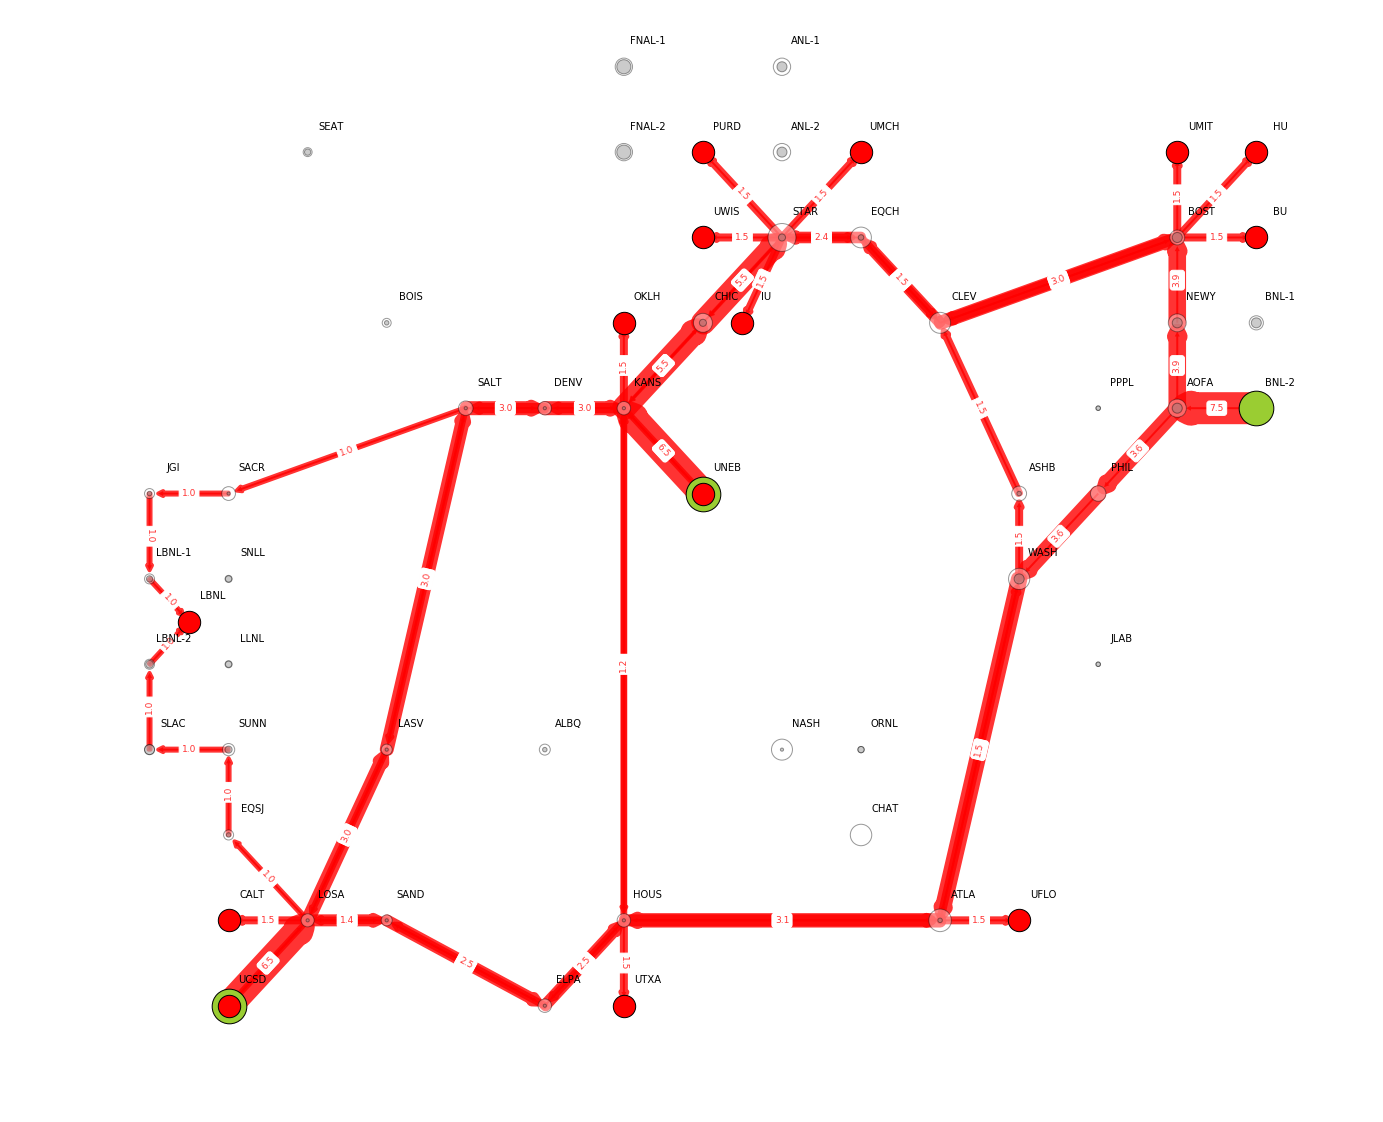

In [22]:
fig = plt.figure(figsize=(24,20))
plt.axis('off')

edgelist = list(all_flows_pd.index.values)
ratelist = dict(all_flows_pd['total'])

foa.drawBaseMap(G,pos=pos,alpha=0.4,edges=False)
foa.highlightNodes(G , pos=pos, nodelist=flow_sources , node_color='yellowgreen' , alpha=1 , node_shape='o')
foa.highlightNodes(G , pos=pos, nodelist=end_sites, node_color='red' , alpha=1 , node_shape='o' , node_size=500)
foa.highlightEdges(G , pos=pos, edgelist=edgelist , rate=ratelist ,  alpha=0.8 , labels=True)

plt.show()

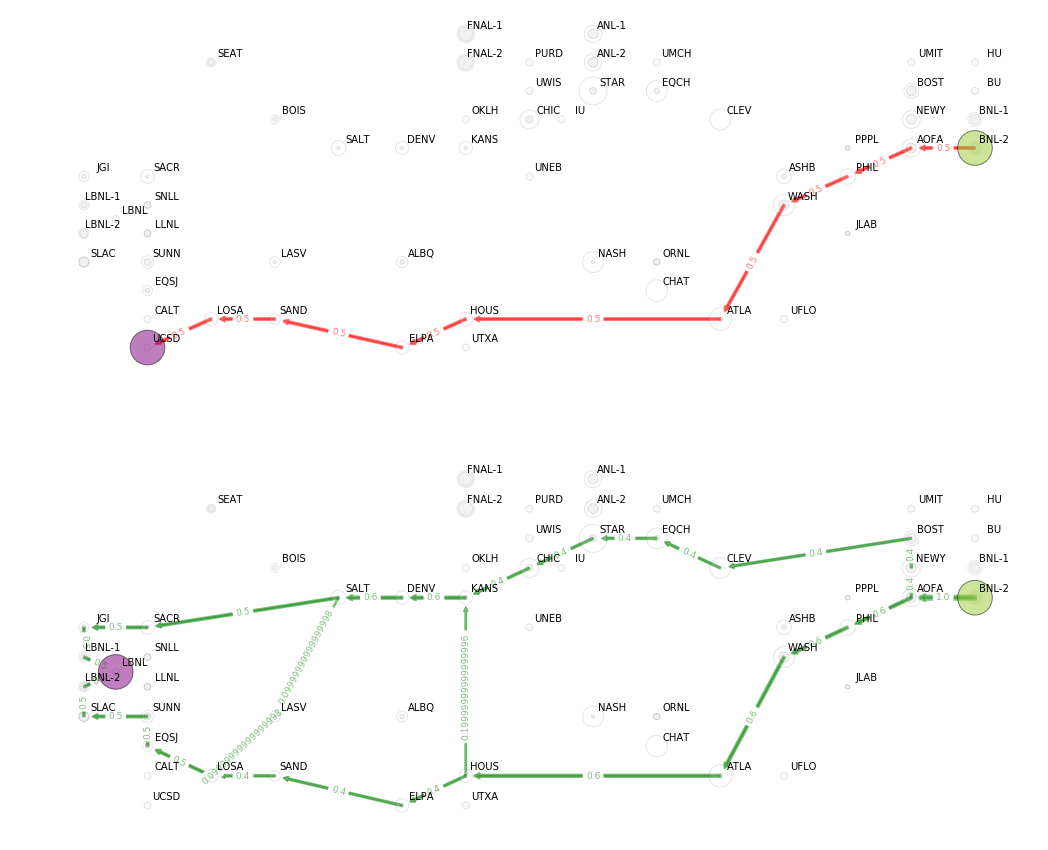

In [23]:

fig = plt.figure(figsize=(18,15))
plt.subplot(2,1,1)
plt.axis('off')

foa.drawBaseMap(G, pos=pos, alpha=0.1,edges=False)   # Draw the background image of the network
foa.highlightFlows(G , pos=pos , flow_sources = flow_sources , flow_dests=['UCSD'] , all_flows=all_flows)

#plt.title('Max FLOW possible from : ' + flow_source + " to " + flow_dest + " is %2.2f Tbps" % flow_rate, fontsize=20)

plt.subplot(2,1,2)
plt.axis('off')

foa.drawBaseMap(G, pos=pos , alpha=0.1,edges=False)   # Draw the background image of the network
foa.highlightFlows(G , pos=pos, flow_sources = flow_sources , flow_dests=['LBNL'] , all_flows=all_flows , 
                   edge_color='green')

#plt.title('Max FLOW possible from : ' + flow_source + " to " + flow_dest + " is %2.2f Tbps" % flow_rate, fontsize=20)
               
plt.show()

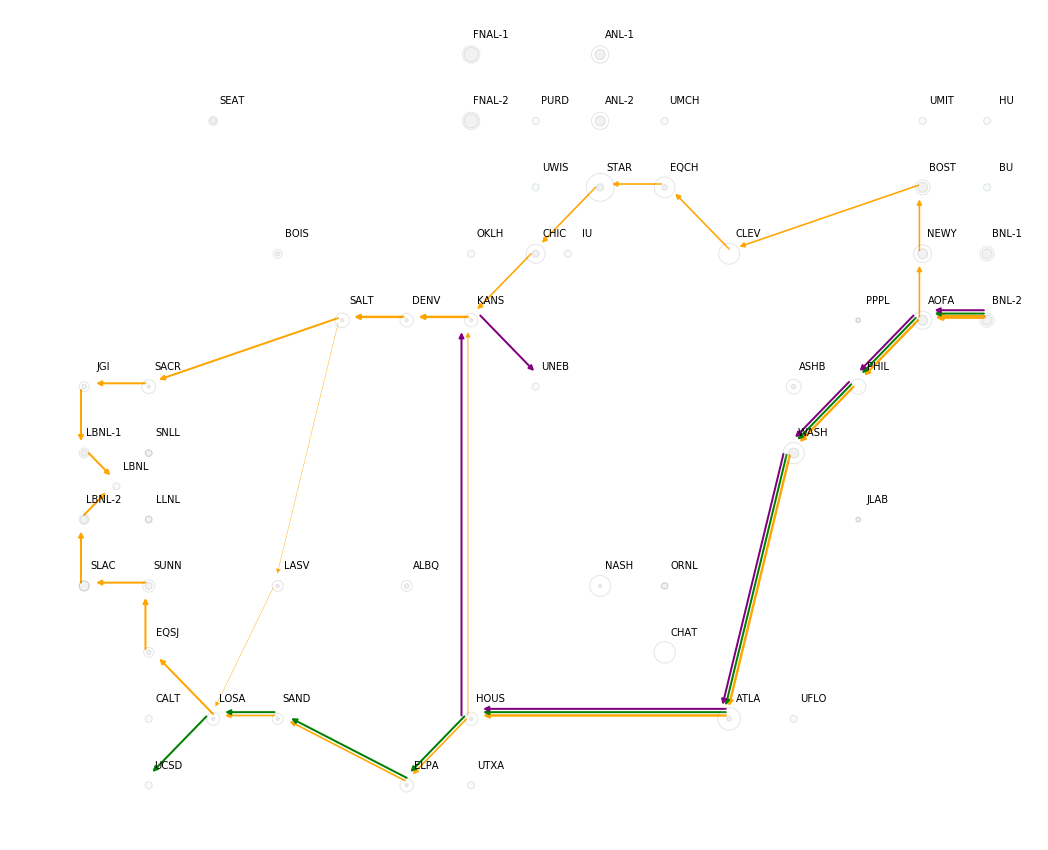

In [24]:
fig = plt.figure(figsize=(18,15))
plt.subplot(1,1,1)
plt.axis('off')

foa.drawBaseMap(G,pos,alpha=0.1,edges=False)   # Draw the background image of the network
#highlightNodes(G , nodelist=[flow_source, flow_dest], node_color=['yellowgreen','purple'])

# Plot the FLOW paths.  See nx.maximum_flows() to understand the "flows" datastructure.

flow_source = flow_sources[0]

flow_dest = 'LBNL'
flows = all_flows[(flow_source,flow_dest)]
flow_rate = all_flow_rates[(flow_source,flow_dest)]

for site , links in flows.items() :
    for link , rate in links.items() :
        if (rate > 0) :
            foa.highlightEdgeVector(G,pos,
                                edgelist=[(site,link)],
                                distance = [ 0.5 ] , 
                                tail=0.5 , head=0.5 , style='parallel' , 
                                edge_color ='orange' , rate=rate , alpha = 1
                               )

flow_dest = 'UCSD'
flows = all_flows[(flow_source,flow_dest)]
flow_rate = all_flow_rates[(flow_source,flow_dest)]

for site , links in flows.items() :
    for link , rate in links.items() :
        if (rate > 0) :
            foa.highlightEdgeVector(G,pos,
                                edgelist=[(site,link)],
                                distance = [ 1.0 ] , 
                                tail=0.5 , head=0.5 , style='parallel' , 
                                edge_color='green' , rate=rate , alpha = 1
                               )

flow_dest = 'UNEB'
flows = all_flows[(flow_source,flow_dest)]
flow_rate = all_flow_rates[(flow_source,flow_dest)]

for site , links in flows.items() :
    for link , rate in links.items() :
        if (rate > 0) :
            foa.highlightEdgeVector(G,pos,
                                edgelist=[(site,link)],
                                distance = [ 1.5 ] , 
                                tail=0.5 , head=0.5 , style='parallel' , 
                                edge_color='purple' , rate=rate , alpha = 1
                               )

            
#plt.title('Max FLOW possible from : ' + flow_source + " to " + flow_dest + " is %2.2f Tbps" % flow_rate, fontsize=20)
plt.show()

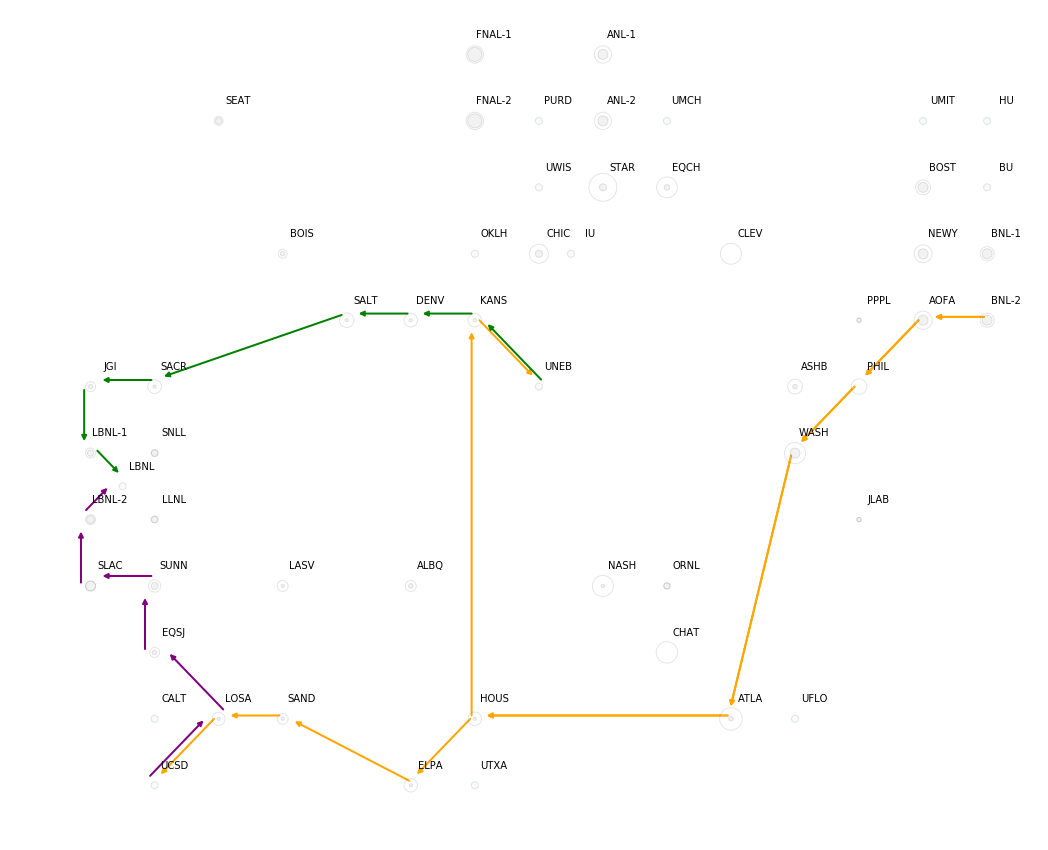

In [27]:
fig = plt.figure(figsize=(18,15))
plt.subplot(1,1,1)
plt.axis('off')

foa.drawBaseMap(G,pos,alpha=0.1,edges=False)   # Draw the background image of the network
#highlightNodes(G , nodelist=[flow_source, flow_dest], node_color=['yellowgreen','purple'])

# Plot the FLOW paths.  See nx.maximum_flows() to understand the "flows" datastructure.

flow_source = flow_sources[0]

flow_dest = 'UNEB'
flows = all_flows[(flow_source,flow_dest)]
flow_rate = all_flow_rates[(flow_source,flow_dest)]

for site , links in flows.items() :
    for link , rate in links.items() :
        if (rate > 0) :
            foa.highlightEdgeVector(G,pos,
                                edgelist=[(site,link)],
                                distance = [ 0.5 ] , 
                                tail=0.5 , head=0.5 , style='parallel' , 
                                edge_color ='orange' , rate=rate , alpha = 1
                               )
            
flow_dest = 'UCSD'
flows = all_flows[(flow_source,flow_dest)]
flow_rate = all_flow_rates[(flow_source,flow_dest)]

for site , links in flows.items() :
    for link , rate in links.items() :
        if (rate > 0) :
            foa.highlightEdgeVector(G,pos,
                                edgelist=[(site,link)],
                                distance = [ 0.5 ] , 
                                tail=0.5 , head=0.5 , style='parallel' , 
                                edge_color ='orange' , rate=rate , alpha = 1
                               )
                        
            
flow_source = flow_sources[1]
            
flow_dest = 'LBNL'
flows = all_flows[(flow_source,flow_dest)]
flow_rate = all_flow_rates[(flow_source,flow_dest)]

for site , links in flows.items() :
    for link , rate in links.items() :
        if (rate > 0) :
            foa.highlightEdgeVector(G,pos,
                                edgelist=[(site,link)],
                                distance = [ 1.0 ] , 
                                tail=0.5 , head=0.5 , style='parallel' , 
                                edge_color='green' , rate=rate , alpha = 1
                               )
flow_source = flow_sources[2]
            
flow_dest = 'LBNL'
flows = all_flows[(flow_source,flow_dest)]
flow_rate = all_flow_rates[(flow_source,flow_dest)]

for site , links in flows.items() :
    for link , rate in links.items() :
        if (rate > 0) :
            foa.highlightEdgeVector(G,pos,
                                edgelist=[(site,link)],
                                distance = [ 1.5 ] , 
                                tail=0.5 , head=0.5 , style='parallel' , 
                                edge_color='purple' , rate=rate , alpha = 1
                               )

            
#plt.title('Max FLOW possible from : ' + flow_source + " to " + flow_dest + " is %2.2f Tbps" % flow_rate, fontsize=20)
plt.show()

In [7]:

flow_dest_list = end_sites

FG = nx.DiGraph()

for flow_dest in flow_dest_list:
    flows = all_flows[(flow_source, flow_dest)] 

#    print ("Processing target site " , flow_dest , "\n")
     
    for site , links in flows.items():
        for link_dest , rate in links.items() :
            if (rate > 0) : 
                FG.add_edge(site,link_dest, rate={flow_dest:rate})
                FG.node[site]['depth'] = 0
                FG.node[link_dest]['depth'] = 0
                FG.node[site]['height'] = 0
                FG.node[link_dest]['height'] = 0
                        
dfs_edges = list(nx.dfs_edges(FG,flow_source))

height = 0
depth  = 0
for edge in dfs_edges:
    sn = edge[0]
    tn = edge[1]
    
    if (FG.node[sn]['depth'] < depth) : height += 1
    depth   = FG.node[sn]['depth'] + 1
    if FG.node[tn]['depth'] < depth : 
        FG.node[tn]['depth']  = depth
        FG.node[tn]['height'] = height 
        
#    print (tn , "=" , FG.node[tn] , "\t", sn , "=", FG.node[sn])

dfs_pos = {}
for node in FG.nodes() :
    dfs_pos[node] = (FG.node[node]['depth'],FG.node[node]['height'])


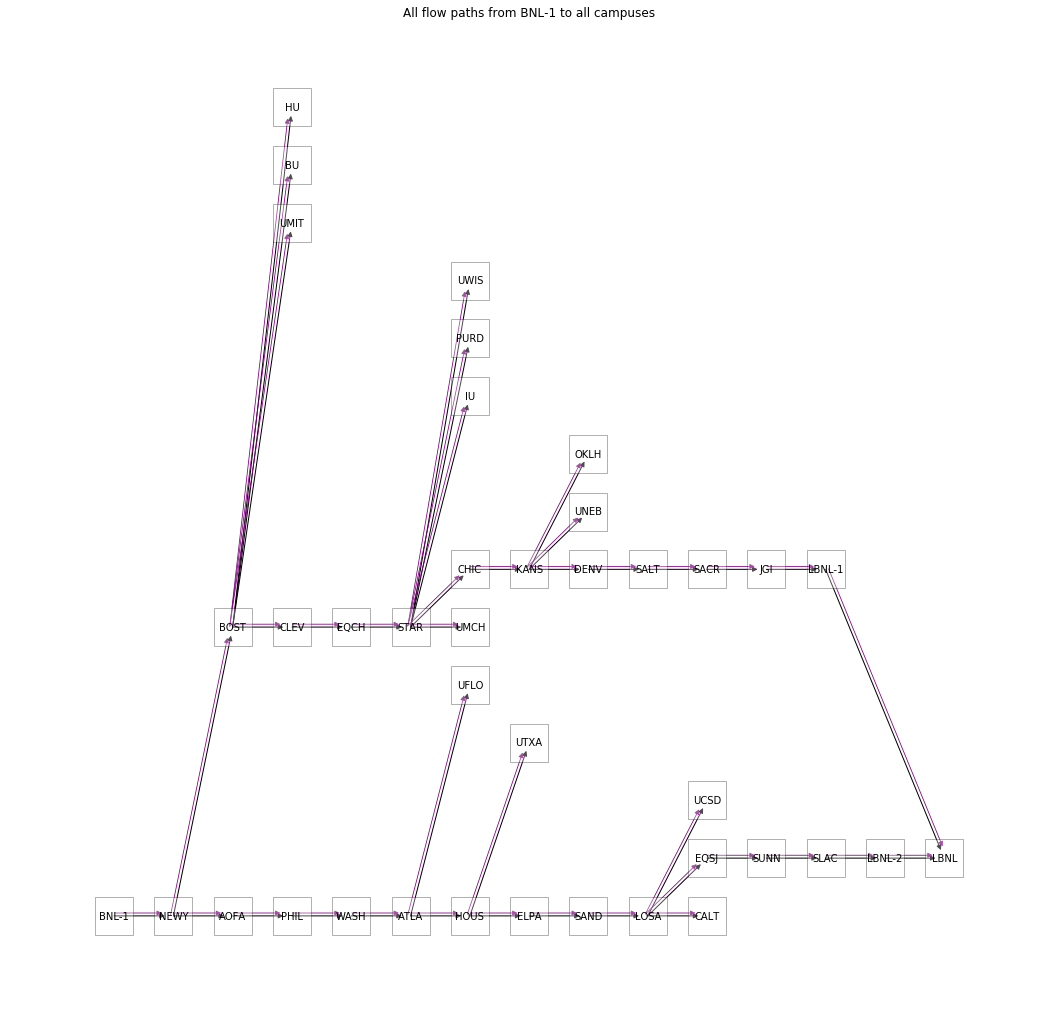

In [8]:
fig = plt.figure(figsize=(18,18))
plt.axis('off')

plt.title('All flow paths from %s to all campuses' % flow_source)

nx.draw_networkx_nodes(FG , pos=dfs_pos , node_size=1500 , node_shape='s',
                           node_color='white', edgecolors='black',alpha=0.3,labels=True)
nx.draw_networkx_edges (FG , pos=dfs_pos )
nx.draw_networkx_labels(FG , pos=dfs_pos, font_size=10)

foa.highlightEdgeVector(FG,pos=dfs_pos, edgelist=FG.edges() ,
                    distance = [ 0.05 ] , 
                    tail=0.01 , head=0.05 , style='parallel' , 
                    edge_color='purple' , rate=0.2 , alpha = 1
                    )

plt.show()


In [9]:
import pygraphviz

graphviz_pos = nx.nx_agraph.graphviz_layout(FG)

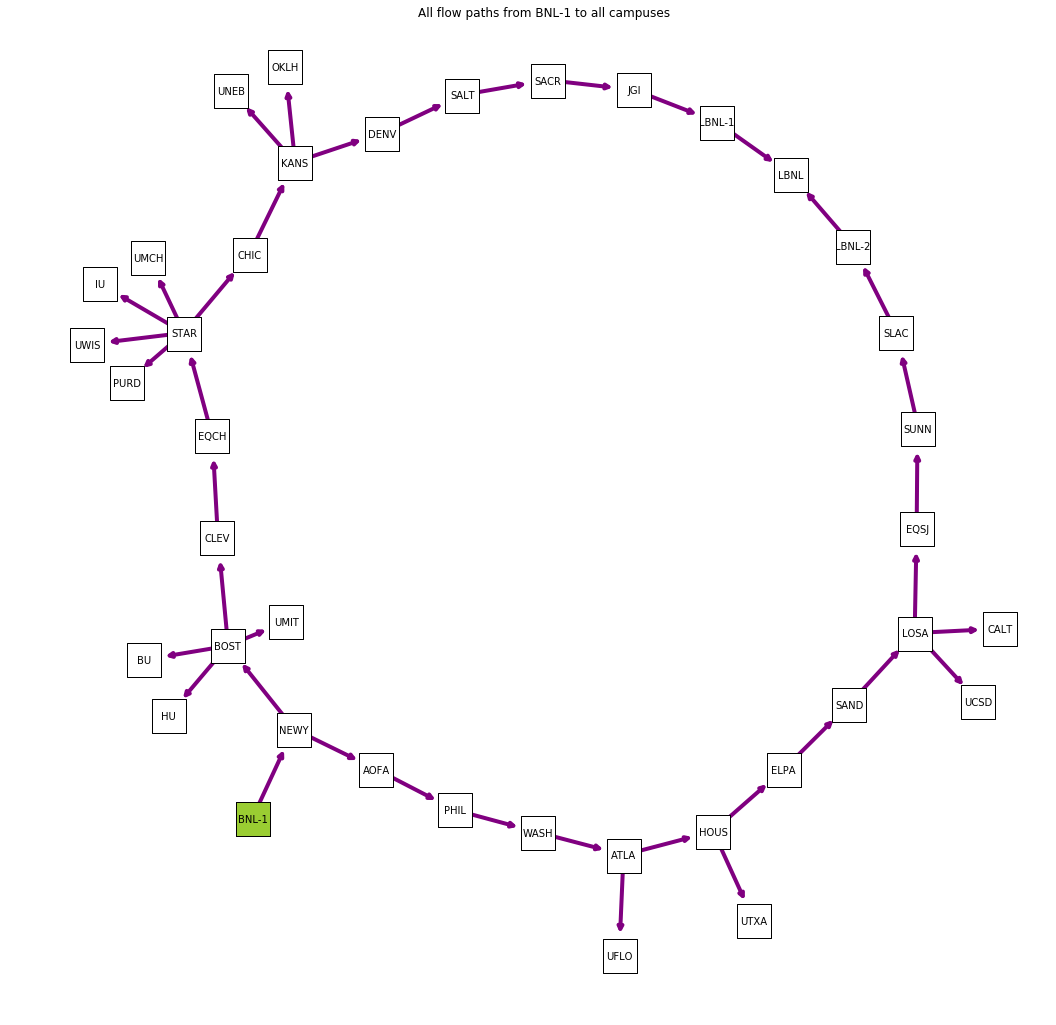

In [10]:
fig = plt.figure(figsize=(18,18))
plt.axis('off')

plt.title('All flow paths from %s to all campuses' % flow_source)

nx.draw_networkx_nodes(FG , pos=graphviz_pos , node_size=1200 , node_shape='s',
                           node_color='white', edgecolors='black',alpha=1,labels=True)
foa.highlightNodes(FG , pos=graphviz_pos, nodelist=[flow_source] , node_color='yellowgreen' , alpha=1 , node_shape='s')
nx.draw_networkx_labels(FG , pos=graphviz_pos, font_size=10)

foa.highlightEdgeVector(FG,pos=graphviz_pos, edgelist=FG.edges() ,
                    distance = [ 0.5 ] , 
                    tail=0.5 , head=12 , style='parallel' , 
                    edge_color='purple' , rate=1 , alpha = 1
                    )

plt.show()

